In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_excel('/content/drive/MyDrive/capstone project/project3/train.xlsx')
df_test=pd.read_excel('/content/drive/MyDrive/capstone project/project3/test.xlsx')


In [3]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [4]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom
3,577078,47369B,BLUE GREEN EMBROIDERY COSMETIC BAG,1,2011-11-17 15:17:00,5.79,NaN,United Kingdom
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379336 entries, 0 to 379335
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    379336 non-null  object        
 1   StockCode    379336 non-null  object        
 2   Description  378373 non-null  object        
 3   Quantity     379336 non-null  int64         
 4   InvoiceDate  379336 non-null  datetime64[ns]
 5   UnitPrice    379336 non-null  float64       
 6   CustomerID   285076 non-null  float64       
 7   Country      379336 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.2+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162573 entries, 0 to 162572
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    162573 non-null  object        
 1   StockCode    162573 non-null  object        
 2   Description  162082 non-null  object        
 3   Quantity     162573 non-null  int64         
 4   InvoiceDate  162573 non-null  datetime64[ns]
 5   UnitPrice    162573 non-null  float64       
 6   CustomerID   121753 non-null  float64       
 7   Country      162573 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 9.9+ MB


In [7]:
df_train.shape

(379336, 8)

In [8]:
df_test.shape

(162573, 8)

Data Cleaning:

1. Perform a preliminary data inspection and data cleaning.

a. Check for missing data and formulate an apt strategy to treat them.

b. Remove duplicate data records.

c. Perform descriptive analytics on the given data.

In [9]:
df_train.isna().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [10]:
df_test.isna().sum()

InvoiceNo          0
StockCode          0
Description      491
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     40820
Country            0
dtype: int64

In [11]:
#percentage of missing data 
df_train['CustomerID'].isna().sum()

94260

In [12]:
len(df_train['CustomerID'])

379336

In [13]:
df_train['CustomerID'].isna().sum()/len(df_train['CustomerID'])*100

24.848682961806947

In [14]:
df_test['CustomerID'].isna().sum()/len(df_test['CustomerID'])*100

25.108720390224697

###------about 25% of missing value in train and test data in CustomerID column and we can't replace that value with mean median mode because customerID are uniquely identified,so we basically have to drop the nan values row--------

In [15]:
df_train.dropna(subset=['CustomerID'],inplace=True)

In [16]:
df_train.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [17]:
df_test.dropna(subset=['CustomerID'],inplace=True)

In [18]:
df_test.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
#remove duplicate
df_train[df_train.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2878,575117,21098,CHRISTMAS TOILET ROLL,1,2011-11-08 14:22:00,1.25,12748.0,United Kingdom
5729,542107,21755,LOVE BUILDING BLOCK WORD,1,2011-01-25 13:38:00,5.95,16222.0,United Kingdom
7615,577778,21733,RED HANGING HEART T-LIGHT HOLDER,1,2011-11-21 16:10:00,2.95,16549.0,United Kingdom
8997,578781,22988,SOLDIERS EGG CUP,1,2011-11-25 11:54:00,1.25,15872.0,United Kingdom
14797,575583,20893,HANGING BAUBLE T-LIGHT HOLDER SMALL,1,2011-11-10 11:55:00,2.55,14456.0,United Kingdom
...,...,...,...,...,...,...,...,...
378899,577773,23507,MINI PLAYING CARDS BUFFALO BILL,1,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
379020,571682,23182,TOILET SIGN OCCUPIED OR VACANT,1,2011-10-18 14:00:00,0.83,14179.0,United Kingdom
379073,564729,22208,WOOD STAMP SET THANK YOU,2,2011-08-28 12:44:00,0.83,13137.0,United Kingdom
379205,538368,22759,SET OF 3 NOTEBOOKS IN PARCEL,1,2010-12-12 10:57:00,1.65,15503.0,United Kingdom


In [20]:
df_test[df_test.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
8912,545038,82582,AREA PATROLLED METAL SIGN,1,2011-02-27 10:13:00,2.10,13684.0,United Kingdom
9493,562571,22055,MINI CAKE STAND HANGING STRAWBERY,1,2011-08-07 12:21:00,1.65,13782.0,United Kingdom
14441,546107,22326,ROUND SNACK BOXES SET OF4 WOODLAND,1,2011-03-09 12:33:00,2.95,17238.0,United Kingdom
14630,558751,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,1,2011-07-03 11:26:00,0.85,16009.0,United Kingdom
15879,543306,22539,MINI JIGSAW DOLLY GIRL,1,2011-02-07 11:56:00,0.42,16686.0,United Kingdom
...,...,...,...,...,...,...,...,...
161121,552652,22475,SKULL DESIGN TV DINNER TRAY,2,2011-05-10 14:09:00,4.95,14591.0,United Kingdom
161245,572861,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2011-10-26 12:46:00,1.25,14102.0,United Kingdom
161512,579132,22866,HAND WARMER SCOTTY DOG DESIGN,1,2011-11-28 12:35:00,2.10,15022.0,United Kingdom
162188,577034,51014C,"FEATHER PEN,COAL BLACK",12,2011-11-17 13:16:00,0.39,12847.0,United Kingdom


In [21]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [22]:
df_train[df_train.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [23]:
df_test[df_test.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [24]:
#discriptive analysis
df_train.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,282420.0,282420,282420,282420.000000,282420,282420.000000,282420.000000,282420
unique,20980.0,3631,3833,NaN,19427,NaN,NaN,37
top,580727.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-12-05 17:17:00,NaN,NaN,United Kingdom
freq,388.0,1439,1435,NaN,388,NaN,NaN,251049
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.110283,NaN,3.526323,15283.894880,NaN
std,NaN,NaN,NaN,297.109127,NaN,80.691250,1712.665383,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,0.000000,12346.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13952.000000,NaN


In [25]:
df_train.describe()

,Quantity,UnitPrice,CustomerID
count,282420.000000,282420.000000,282420.000000
mean,12.110283,3.526323,15283.894880
std,297.109127,80.691250,1712.665383
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13952.000000
50%,5.000000,1.950000,15150.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


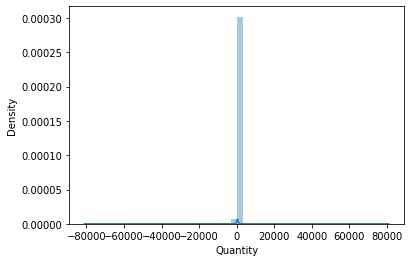

In [26]:
sns.distplot(df_train['Quantity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


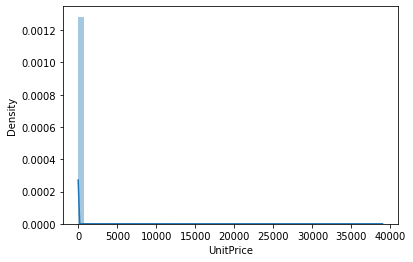

In [27]:
sns.distplot(df_train['UnitPrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


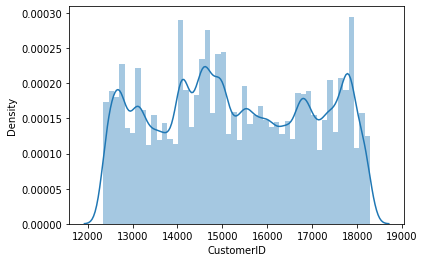

In [28]:
sns.distplot(df_train['CustomerID'])

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

b. Analyze the retention rate of customers.

In [29]:
df_train['InvoiceDate']=pd.to_datetime(df_train.InvoiceDate, format='%Y-%m-%d')

In [30]:
df_train['InvoiceDate'].nunique()

19427

In [31]:
df_train['InvoiceDate'].dt.year.unique()

array([2011, 2010])

In [32]:
df_train['InvoiceDate'].dt.month.unique()

array([ 6,  5,  1, 12,  9, 10,  2, 11,  7,  8,  3,  4])

In [33]:
df_train['Invoice_month']=df_train['InvoiceDate'].apply(lambda x:x.strftime('%Y-%m'))

In [34]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05


In [35]:
#create a column to understand customer has active invoice or cancelled invoice


In [36]:
df_train.loc[df_train['InvoiceNo'].str.startswith('c') == False,'InvoiceNo'].count()


6199

In [37]:
df_test.loc[df_test['InvoiceNo'].str.startswith('c') == False,'InvoiceNo'].count()


2685

In [38]:
df_train.loc[df_train['InvoiceNo'].str.startswith('c') == False,'Type'] ='C'  # Creating a derived column, transaction type
df_train['Type'].fillna('A',inplace=True) # Rest of transactions as Active

In [39]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06,A
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05,A
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01,A
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12,A
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05,A


In [40]:
df_test['Invoice_month']=df_test['InvoiceDate'].apply(lambda x:x.strftime('%Y-%m'))

In [41]:
df_test.loc[df_test['InvoiceNo'].str.startswith('c') == False,'Type'] = 'C' # Creating a derived column, transaction type
df_test['Type'].fillna('A',inplace=True) # Rest of transactions as Active

In [42]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom,2011-03,A
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom,2011-09,A
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom,2011-10,C
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom,2010-12,A
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom,2011-08,A


In [43]:
#plot customercount and invoicecount for diff invoice month


In [44]:
df_train.Invoice_month.unique()

array(['2011-06', '2011-05', '2011-01', '2010-12', '2011-09', '2011-10',
       '2011-02', '2011-11', '2011-07', '2011-08', '2011-03', '2011-04',
       '2011-12'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


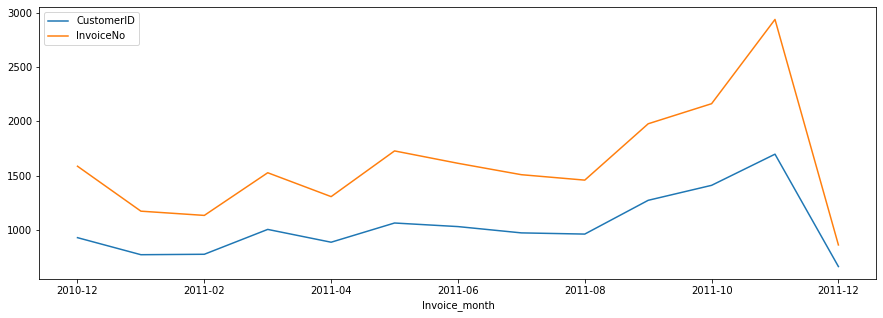

In [45]:
count_plot = df_train.groupby('Invoice_month').agg({'CustomerID':pd.Series.nunique,'InvoiceNo':pd.Series.nunique})
count_plot.column=['Customer_count','Invoice_count']
count_plot.plot(figsize=(15,5))
plt.legend()
plt.show()

here the count of cutomer and invoice keeps on increasing in every month , now we have to see how many users keeps on purchasing

In [46]:
df_train['CohortMonth']=df_train.groupby('CustomerID')['Invoice_month'].transform('min')
df_test['CohortMonth']=df_test.groupby('CustomerID')['Invoice_month'].transform('min')

In [47]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06,A,2011-02
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05,A,2010-12
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01,A,2010-12
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12,A,2010-12
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05,A,2011-02


In [48]:
df_train[df_train['CustomerID']==16126.0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06,A,2011-02
777,564752,23298,SPOTTY BUNTING,21,2011-08-30 10:07:00,4.95,16126.0,United Kingdom,2011-08,A,2011-02
1532,564752,20971,PINK BLUE FELT CRAFT TRINKET BOX,36,2011-08-30 10:07:00,1.25,16126.0,United Kingdom,2011-08,A,2011-02
12973,575687,22273,FELTCRAFT DOLL MOLLY,18,2011-11-10 16:03:00,2.95,16126.0,United Kingdom,2011-11,A,2011-02
23865,575687,22065,CHRISTMAS PUDDING TRINKET POT,48,2011-11-10 16:03:00,0.39,16126.0,United Kingdom,2011-11,A,2011-02


The customer, 16126, started becoming active on the site from 2011-02

In [49]:
df_train[df_train['CustomerID']==15529.0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01,A,2010-12
1150,569424,21929,JUMBO BAG PINK VINTAGE PAISLEY,3,2011-10-04 10:49:00,2.08,15529.0,United Kingdom,2011-10,A,2010-12
1328,560650,72351A,SET/6 TURQUOISE BUTTERFLY T-LIGHTS,2,2011-07-20 11:38:00,2.10,15529.0,United Kingdom,2011-07,A,2010-12
1330,569424,23388,WOODLAND MINI BACKPACK,3,2011-10-04 10:49:00,4.15,15529.0,United Kingdom,2011-10,A,2010-12
1796,553074,62043B,BLUE CHECK BAG W HANDLE 34X20CM,2,2011-05-13 11:45:00,0.83,15529.0,United Kingdom,2011-05,A,2010-12


The customer, 15529, started becoming active on the site from 2010-12

 cohort index is created for each row. The cohort index is the month difference between invoice month and cohort month for each row. By doing the deduction, I am able to know the month lapse between that specific transaction and the first transaction that user made on the website. This helps to check the user retention

In [50]:
def get_date(df,column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year , month

df_train['Invoice_month']=pd.to_datetime(df_train['Invoice_month']) 
df_train['CohortMonth']=pd.to_datetime(df_train['CohortMonth'])
df_test['Invoice_month']=pd.to_datetime(df_test['Invoice_month']) 
df_test['CohortMonth']=pd.to_datetime(df_test['CohortMonth'])  

invoice_year,invoice_month = get_date(df_train,'Invoice_month')
cohort_year,cohort_month = get_date(df_train,'CohortMonth')
year_diff = invoice_year-cohort_year
month_diff = invoice_month-cohort_month
df_train['CohortIndex']=year_diff * 12 + month_diff


invoice_year,invoice_month = get_date(df_test,'Invoice_month')
cohort_year,cohort_month = get_date(df_test,'CohortMonth')
year_diff = invoice_year-cohort_year
month_diff = invoice_month-cohort_month
df_test['CohortIndex']=year_diff * 12 + month_diff

In [51]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth,CohortIndex
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,A,2011-02-01,4
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,A,2010-12-01,5
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,A,2010-12-01,1
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,A,2010-12-01,0
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,A,2011-02-01,3


In [52]:
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth,CohortIndex
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom,2011-03-01,A,2011-01-01,2
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom,2011-09-01,A,2011-09-01,0
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom,2011-10-01,C,2011-09-01,1
6,538795,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-14 11:42:00,2.55,13267.0,United Kingdom,2010-12-01,A,2010-12-01,0
8,561968,23077,DOUGHNUT LIP GLOSS,20,2011-08-01 13:29:00,1.25,16332.0,United Kingdom,2011-08-01,A,2011-02-01,6


In [53]:
df_train[df_train['CustomerID']==16126].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth,CohortIndex
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,A,2011-02-01,4
777,564752,23298,SPOTTY BUNTING,21,2011-08-30 10:07:00,4.95,16126.0,United Kingdom,2011-08-01,A,2011-02-01,6
1532,564752,20971,PINK BLUE FELT CRAFT TRINKET BOX,36,2011-08-30 10:07:00,1.25,16126.0,United Kingdom,2011-08-01,A,2011-02-01,6
12973,575687,22273,FELTCRAFT DOLL MOLLY,18,2011-11-10 16:03:00,2.95,16126.0,United Kingdom,2011-11-01,A,2011-02-01,9
23865,575687,22065,CHRISTMAS PUDDING TRINKET POT,48,2011-11-10 16:03:00,0.39,16126.0,United Kingdom,2011-11-01,A,2011-02-01,9


In [54]:
df_train[df_train['CustomerID']==15529].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth,CohortIndex
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,A,2010-12-01,1
1150,569424,21929,JUMBO BAG PINK VINTAGE PAISLEY,3,2011-10-04 10:49:00,2.08,15529.0,United Kingdom,2011-10-01,A,2010-12-01,10
1328,560650,72351A,SET/6 TURQUOISE BUTTERFLY T-LIGHTS,2,2011-07-20 11:38:00,2.10,15529.0,United Kingdom,2011-07-01,A,2010-12-01,7
1330,569424,23388,WOODLAND MINI BACKPACK,3,2011-10-04 10:49:00,4.15,15529.0,United Kingdom,2011-10-01,A,2010-12-01,10
1796,553074,62043B,BLUE CHECK BAG W HANDLE 34X20CM,2,2011-05-13 11:45:00,0.83,15529.0,United Kingdom,2011-05-01,A,2010-12-01,5


In [55]:
from tables.table import Column
Cohort_data = df_train.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_count = Cohort_data.pivot_table(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_count

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,929.0,350.0,297.0,353.0,332.0,367.0,351.0,322.0,325.0,361.0,344.0,460.0,248.0
2011-01-01,422.0,102.0,120.0,104.0,141.0,122.0,113.0,109.0,132.0,148.0,157.0,66.0,NaN
2011-02-01,377.0,91.0,72.0,101.0,102.0,91.0,95.0,101.0,97.0,117.0,32.0,NaN,NaN
2011-03-01,441.0,81.0,110.0,93.0,101.0,76.0,113.0,103.0,125.0,37.0,NaN,NaN,NaN
2011-04-01,298.0,67.0,65.0,60.0,61.0,71.0,69.0,78.0,23.0,NaN,NaN,NaN,NaN
2011-05-01,278.0,60.0,48.0,48.0,59.0,69.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,238.0,46.0,43.0,62.0,57.0,80.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,192.0,39.0,38.0,45.0,55.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,166.0,38.0,41.0,41.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


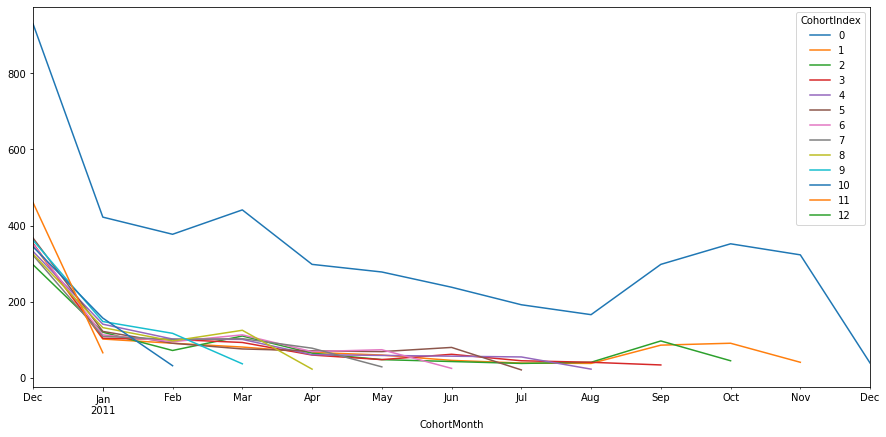

In [56]:
cohort_count.plot(figsize = (15,7))
plt.show()

The 13th column and 2010–12–01 row means 248 users out of 929 users were still buying things after the 13 months from 2010/12/1.
The user retention rate is quite low, since the no of active customers, who keeps on purchasing is reducing.
Need to investigate further to find the reason
The findings can be plotted using a heatmap

In [57]:
cohort_size = cohort_count.iloc[:,0]
retention = cohort_count.divide(cohort_size,axis=0)
retention.round(3)*100

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,37.7,32.0,38.0,35.7,39.5,37.8,34.7,35.0,38.9,37.0,49.5,26.7
2011-01-01,100.0,24.2,28.4,24.6,33.4,28.9,26.8,25.8,31.3,35.1,37.2,15.6,NaN
2011-02-01,100.0,24.1,19.1,26.8,27.1,24.1,25.2,26.8,25.7,31.0,8.5,NaN,NaN
2011-03-01,100.0,18.4,24.9,21.1,22.9,17.2,25.6,23.4,28.3,8.4,NaN,NaN,NaN
2011-04-01,100.0,22.5,21.8,20.1,20.5,23.8,23.2,26.2,7.7,NaN,NaN,NaN,NaN
2011-05-01,100.0,21.6,17.3,17.3,21.2,24.8,26.6,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,19.3,18.1,26.1,23.9,33.6,10.5,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.3,19.8,23.4,28.6,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,22.9,24.7,24.7,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


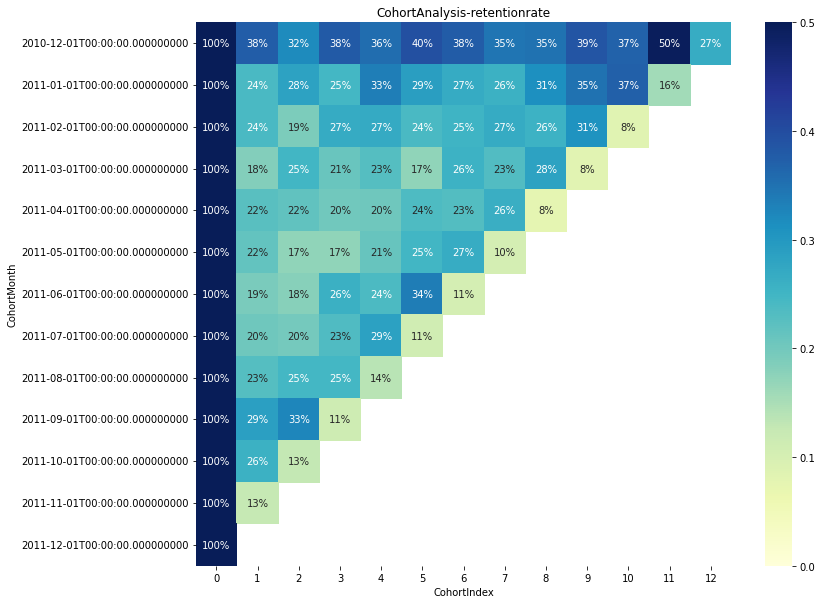

In [58]:
plt.figure(figsize=(12,10))
sns.heatmap(data = retention, 
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0,
            vmax = 0.5,
            cmap = "YlGnBu")
plt.title('CohortAnalysis-retentionrate')
plt.show()

From the graph , it can be concluded that the user retention drops quite heavily, even from the second month
50% is the highest retention rate
Retenion rate is high for users acquired in 2011-01 and 2010-12

In [59]:
#Analyze the average quantity purchased using cohort Analysis
cohort_avg_quat = df_train.groupby(['CohortMonth','CohortIndex'])['Quantity'].mean().reset_index()
cohort_avg_quat

,CohortMonth,CohortIndex,Quantity
0,2010-12-01,0,10.718009
1,2010-12-01,1,14.232635
2,2010-12-01,2,14.744875
3,2010-12-01,3,14.212482
4,2010-12-01,4,13.213349
...,...,...,...
86,2011-10-01,1,6.911776
87,2011-10-01,2,8.508744
88,2011-11-01,0,9.312029
89,2011-11-01,1,9.449294


In [60]:
#pivoting the table
average_quantity = cohort_avg_quat.pivot_table(index='CohortMonth',columns='CohortIndex',values='Quantity').round(1)
average_quantity

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12-01,10.7,14.2,14.7,14.2,13.2,14.0,14.5,14.5,16.1,15.7,16.8,12.5,14.5
2011-01-01,10.8,14.3,15.0,10.1,13.1,18.3,15.2,15.8,13.5,11.2,9.6,13.7,NaN
2011-02-01,10.9,11.5,19.5,12.0,10.8,12.2,13.3,12.1,11.1,12.1,14.7,NaN,NaN
2011-03-01,9.5,10.3,12.0,9.2,13.5,11.3,13.5,13.4,9.7,7.5,NaN,NaN,NaN
2011-04-01,9.7,10.1,10.0,11.1,11.1,8.0,10.0,9.4,7.1,NaN,NaN,NaN,NaN
2011-05-01,12.0,9.1,12.7,15.3,11.2,8.5,10.5,7.7,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.3,12.3,10.7,13.5,10.0,9.7,9.6,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,9.7,12.2,8.4,9.9,7.1,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,10.0,6.3,5.5,6.2,7.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


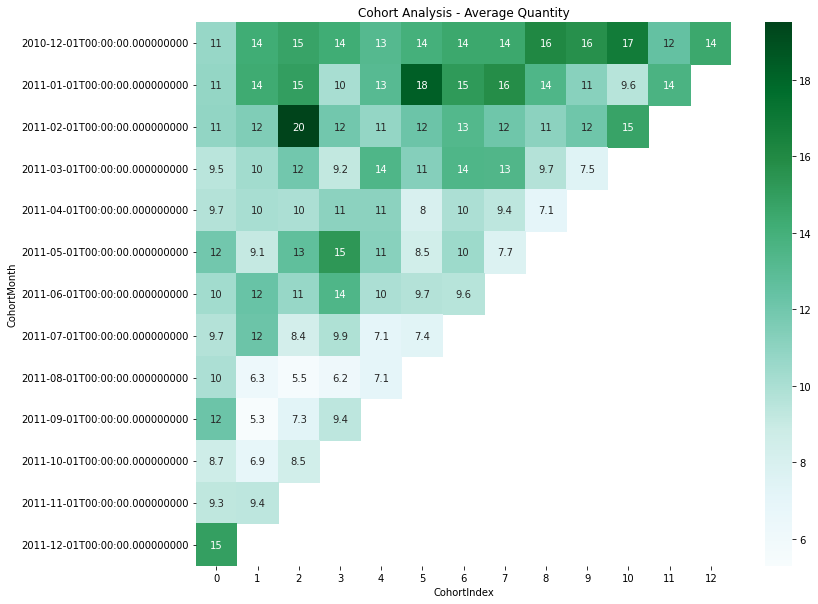

In [61]:
plt.figure(figsize = (12,10))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, 
            annot = True, 
            cmap = "BuGn")
plt.show()

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.
2. Calculate RFM metrics.

In [62]:
# calculate sales price for users
df_train['Sales_price'] = df_train['Quantity'] * df_train['UnitPrice']
df_test['Sales_price'] = df_test['Quantity'] * df_test['UnitPrice']

In [63]:
df_train.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth,CohortIndex,Sales_price
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,A,2011-02-01,4,30.0


In [64]:
df_test.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth,CohortIndex,Sales_price
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom,2011-03-01,A,2011-01-01,2,21.0


In [65]:
# to calculate R,F and M following columns is important
df_train[['InvoiceNo','InvoiceDate','CustomerID','Sales_price']].head()

,InvoiceNo,InvoiceDate,CustomerID,Sales_price
1,556072,2011-06-08 14:57:00,16126.0,30.00
2,551739,2011-05-04 10:58:00,18118.0,5.10
3,541658,2011-01-20 12:16:00,15529.0,0.85
4,538364,2010-12-10 17:26:00,14448.0,19.50
5,552306,2011-05-08 15:20:00,13911.0,15.00


In [66]:
#setting up date value from which recency can be calculated
from datetime import timedelta
NOW = df_train['InvoiceDate'].max()+timedelta(days=1)
NOW

Timestamp('2011-12-10 12:50:00')

In [67]:
rfm = df_train.groupby('CustomerID').agg({'InvoiceDate':lambda x: (NOW-x.max()).days,
                                          'InvoiceNo':lambda x: len(x),
                                          'Sales_price':lambda x: sum(x)})

rfm.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'Sales_price':'MonetaryValue'},inplace=True)
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,132,3124.96
12348.0,75,20,1009.88
12349.0,19,50,1344.17
12350.0,310,11,213.30


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

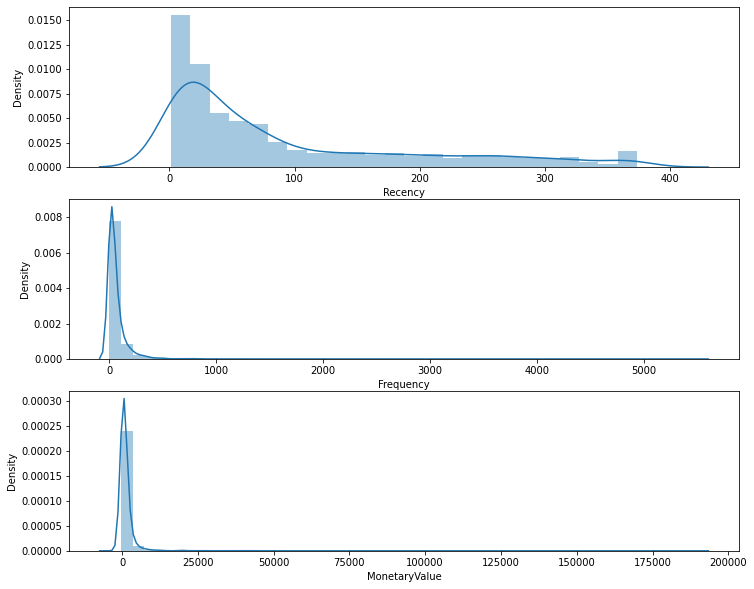

In [68]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); 
sns.distplot(rfm['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); 
sns.distplot(rfm['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); 
sns.distplot(rfm['MonetaryValue'])
# Show the plot
plt.show()

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

b1. Combine three ratings to get a RFM segment (as strings).

b2. Get the RFM score by adding up the three ratings.

b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

In [69]:
# Create R,F,M group---
# Create labels for RFM
r_labels= range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)

#Assign these labels to 4 equals percentile groups
r_groups = pd.qcut(rfm['Recency'],q=4,labels=r_labels)
f_groups = pd.qcut(rfm['Frequency'],q=4,labels=f_labels)
m_groups = pd.qcut(rfm['MonetaryValue'],q=4,labels=m_labels)

In [70]:
r_groups

CustomerID
12346.0    1
12347.0    4
12348.0    2
12349.0    3
12350.0    1
          ..
18280.0    1
18281.0    1
18282.0    4
18283.0    4
18287.0    3
Name: Recency, Length: 4353, dtype: category
Categories (4, int64): [4 < 3 < 2 < 1]

In [71]:
#Create New columns R,F and M
rfm = rfm.assign(R = r_groups.values,F=f_groups.values,M = m_groups.values)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,132,3124.96,4,4,4
12348.0,75,20,1009.88,2,2,3
12349.0,19,50,1344.17,3,3,4
12350.0,310,11,213.30,1,1,2


In [72]:
#Combine three rating to get a RFM segments (as string)
rfm['rfm_segment']=rfm.apply(lambda x: (str(x['R']) + str(x['F']) + str(x['M'])),axis=1,)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,rfm_segment
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0
12347.0,2,132,3124.96,4,4,4,4.04.04.0
12348.0,75,20,1009.88,2,2,3,2.02.03.0
12349.0,19,50,1344.17,3,3,4,3.03.04.0
12350.0,310,11,213.30,1,1,2,1.01.02.0


In [73]:
#Get the RFM score by adding up the three ratings
rfm['RFM_score'] = rfm[['R','F','M']].sum(axis=1)
rfm['RFM_score'] = rfm['RFM_score'].apply(lambda x: int(x))
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,rfm_segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3
12347.0,2,132,3124.96,4,4,4,4.04.04.0,12
12348.0,75,20,1009.88,2,2,3,2.02.03.0,7
12349.0,19,50,1344.17,3,3,4,3.03.04.0,10
12350.0,310,11,213.30,1,1,2,1.01.02.0,4


In [74]:
#Analyze the RFM segments by summarizing them and comment on the findings.
rfm['RFM_score'].nunique()

10

In [75]:
rfm['RFM_score'].unique()

array([ 3, 12,  7, 10,  4, 11,  6,  8,  9,  5])

In [76]:
#define rmf level fuction
def rfm_level(df):
    if df['RFM_score']>=9:
       return 'cant loose them'
    elif ((df['RFM_score']>=8 and df['RFM_score']<9)):
       return 'Champions'
    elif ((df['RFM_score']>=7 and df['RFM_score']<8)):
       return 'Loyal'
    elif ((df['RFM_score']>=6 and df['RFM_score']<7)):
       return 'Potential'   
    elif ((df['RFM_score']>=5 and df['RFM_score']<6)):
       return 'promissing'
    elif ((df['RFM_score']>=8 and df['RFM_score']<9)):
       return 'Need Attention'
    else:
      return 'Required Attention'      

#create a new variable rfm_level
rfm['rfm_level'] = rfm.apply(rfm_level,axis=1)
rfm.head()


,Recency,Frequency,MonetaryValue,R,F,M,rfm_segment,RFM_score,rfm_level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Required Attention
12347.0,2,132,3124.96,4,4,4,4.04.04.0,12,cant loose them
12348.0,75,20,1009.88,2,2,3,2.02.03.0,7,Loyal
12349.0,19,50,1344.17,3,3,4,3.03.04.0,10,cant loose them
12350.0,310,11,213.30,1,1,2,1.01.02.0,4,Required Attention


In [77]:
#calculate average value of each RFM level,and return size of each segment
rfm_level_agg = rfm.groupby('rfm_level').agg({'Recency':'mean',
                                              'Frequency':'mean',
                                              'MonetaryValue':['mean','count']}).round(1)


rfm_level_agg.head()


Recency Frequency MonetaryValue      
                      mean      mean          mean count
rfm_level                                               
Champions             61.5      39.8         670.5   496
Loyal                 80.6      27.9         505.9   434
Potential            100.0      20.1         368.7   458
Required Attention   222.2       7.8         115.7   792
cant loose them       25.6     136.6        2901.9  1668

In [78]:
rfm.to_excel("/content/drive/MyDrive/capstone project/project3/rfmtrain.xlsx")

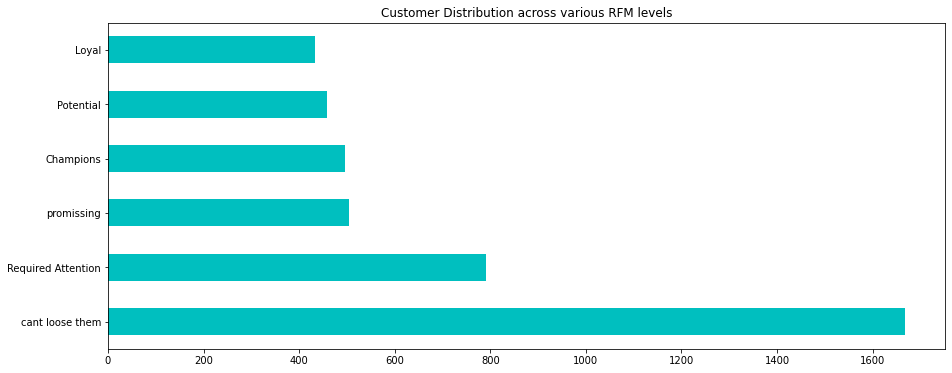

In [79]:
rfm['rfm_level'].value_counts().plot(kind='barh',figsize=(15,6),color='c')
plt.title('Customer Distribution across various RFM levels')
plt.show()

we can see that a large percentage of our customers are in the top tier RFM levels.The rest of the customers are not loyal, and needs some kind of marketing strategy to bring them back

Data Modeling :

1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

In [80]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [81]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth,CohortIndex,Sales_price
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,A,2011-02-01,4,30.00
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2011-05-01,A,2010-12-01,5,5.10
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2011-01-01,A,2010-12-01,1,0.85
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-01,A,2010-12-01,0,19.50
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-05-01,A,2011-02-01,3,15.00


In [82]:
feature_col = ['CustomerID','Sales_price']
x_train=df_train[feature_col]

In [83]:
sc=StandardScaler()
x_train_scaled = sc.fit_transform(x_train)

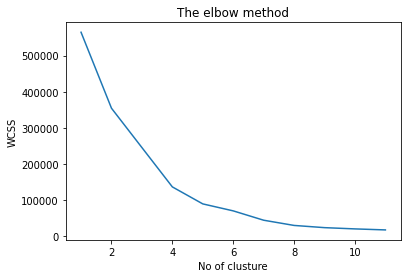

In [84]:
# Decide the optimum number of clusters to be formed.
#Within-Clusture sum of square (WCSS)
WCSS = []

for i in  range(1,12):
    kmeans = KMeans(n_clusters=i,
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state=0)
    kmeans.fit(x_train_scaled)
    #sum of squared distance of sample to their closest cluster center
    WCSS.append(kmeans.inertia_)

#plotting the line graph ,allowing us to observed(the elbow)
plt.plot(range(1,12),WCSS)
plt.title('The elbow method')
plt.xlabel('No of clusture')
plt.ylabel('WCSS')
plt.show()    


optimum no of clusture is 4 , where you can see elbow in graph

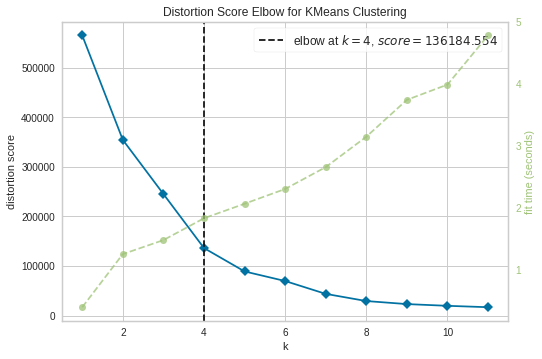

In [85]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans,k=(1,12))
visualizer.fit(x_train_scaled)
visualizer.poof()

In [86]:
#predicting clustering using test dataset
x_test = df_test[feature_col]
x_test_scaled = sc.fit_transform(x_test)

In [95]:
kmeans1 = KMeans(n_clusters=4,
                    init = 'k-means++',
                    max_iter = 300,
                    n_init = 10,
                    random_state=0)

y_pred = kmeans1.fit_predict(x_test_scaled)

In [88]:
df_test['Cluster']=y_pred

In [89]:
y_pred_train = kmeans1.fit_predict(x_train_scaled)
df_train['Cluster']=y_pred_train

In [90]:
df_train.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth,CohortIndex,Sales_price,Cluster
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-06-01,A,2011-02-01,4,30.0,1


In [91]:
df_test.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_month,Type,CohortMonth,CohortIndex,Sales_price,Cluster
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom,2011-03-01,A,2011-01-01,2,21.0,1


In [92]:
df_test['Cluster'].unique()

array([1, 0, 3, 2], dtype=int32)

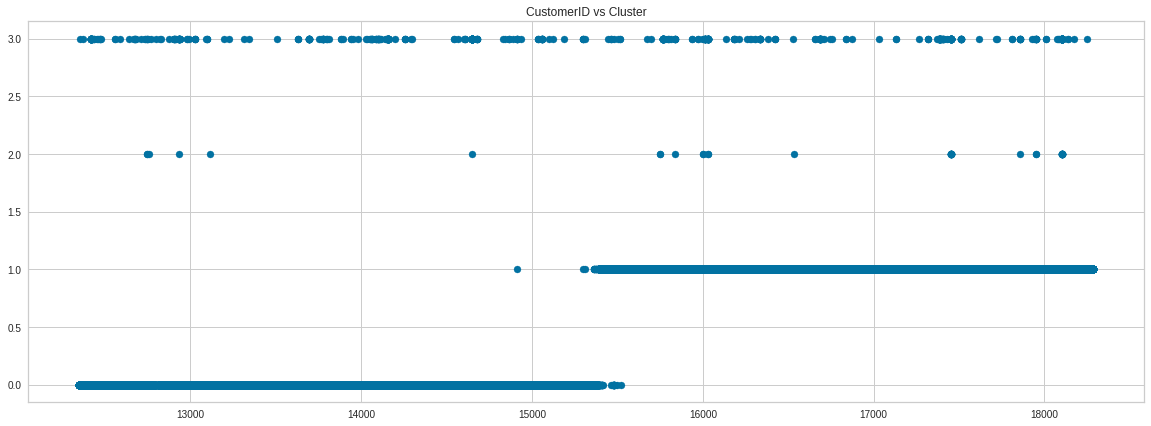

In [93]:
#Analyze these clusters and comment on the results.
plt.figure(figsize=(20,7))
plt.scatter(x=df_test['CustomerID'],y=df_test['Cluster'])
plt.title('CustomerID vs Cluster')
plt.show()

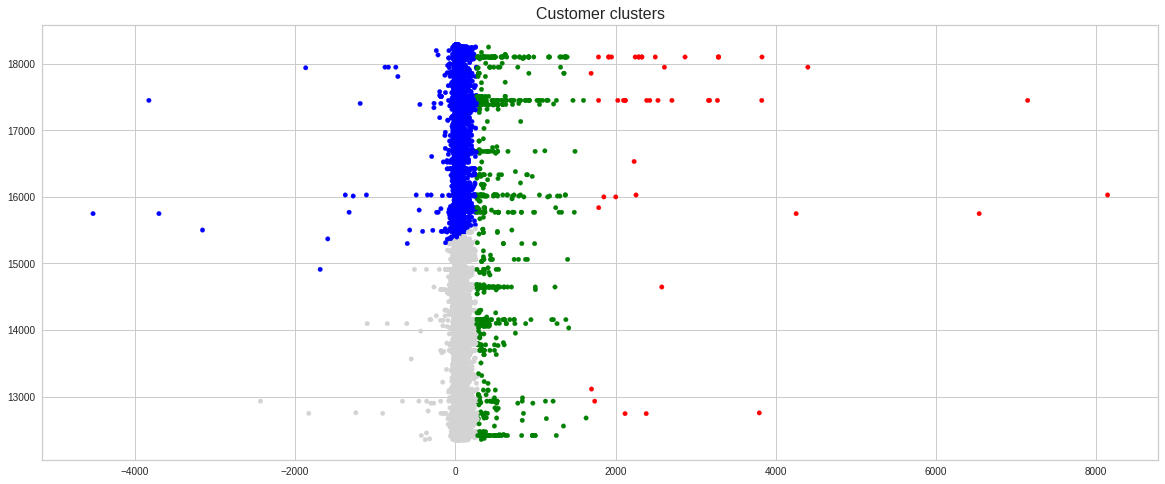

In [96]:
colormap = np.array(['lightgray', 'blue', 'red','green'])

plt.figure(figsize=(20, 8))
plt.scatter(x=df_test['Sales_price'],y=df_test['CustomerID'],c=colormap[kmeans1.labels_], s=20)
plt.title("Customer clusters",fontsize=16)
plt.show()

In [97]:
#Applying K-Means Clustering on RFM Variables
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,rfm_segment,RFM_score,rfm_level
CustomerID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,1.01.01.0,3,Required Attention
12347.0,2,132,3124.96,4,4,4,4.04.04.0,12,cant loose them
12348.0,75,20,1009.88,2,2,3,2.02.03.0,7,Loyal
12349.0,19,50,1344.17,3,3,4,3.03.04.0,10,cant loose them
12350.0,310,11,213.30,1,1,2,1.01.02.0,4,Required Attention


In [98]:
rfm.corr()

,Recency,Frequency,MonetaryValue,RFM_score
Recency,1.000000,-0.208125,-0.136087,-0.699481
Frequency,-0.208125,1.000000,0.461855,0.396501
MonetaryValue,-0.136087,0.461855,1.000000,0.258208
RFM_score,-0.699481,0.396501,0.258208,1.000000


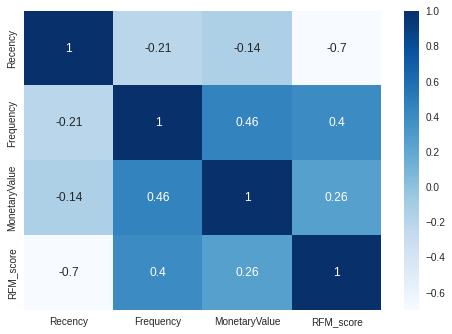

In [99]:
sns.heatmap(rfm.corr(),cmap="Blues",annot=True)

Looking at this heatmap, we see that there is a negative correlation between Recency : Frequency and Recency : Monetary, but there is a positive correlation between Frequency : Monetary


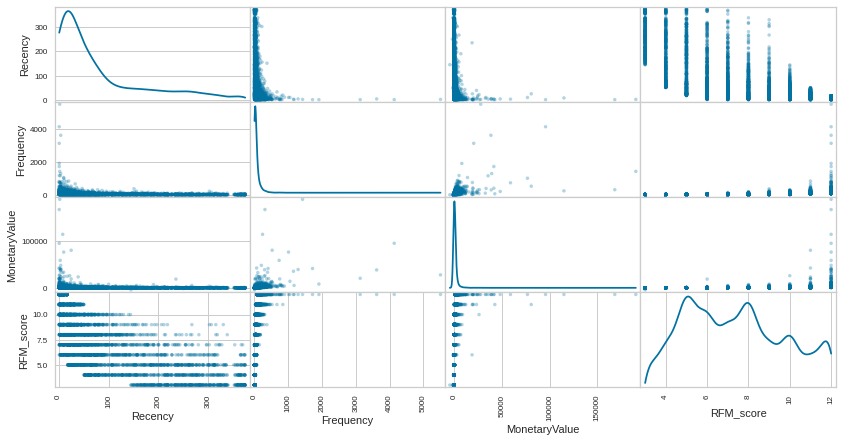

In [100]:
from pandas.plotting import scatter_matrix
scatter_matrix(rfm, alpha = 0.3, figsize = (14,7), diagonal = 'kde')
plt.show()

Notice that there is a skewed distribution for the 3 variables and there are outliers.
Since clustering algorithms require a normal distribution, normalization of the data is required.

In [101]:
#Data Normalization
r_log=np.log(rfm['Recency'] +0.1)
f_log=np.log(rfm['Frequency'])
m_log=np.log(rfm['MonetaryValue'] +0.1)
log_data = pd.DataFrame({'Monetary': m_log, 'Recency': r_log, 'Frequency': f_log})
log_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Monetary,Recency,Frequency
CustomerID,,,
12346.0,-2.302585,5.787204,0.693147
12347.0,8.047209,0.741937,4.882802
12348.0,6.917686,4.318821,2.995732
12349.0,7.203606,2.949688,3.912023
12350.0,5.363168,5.736895,2.397895


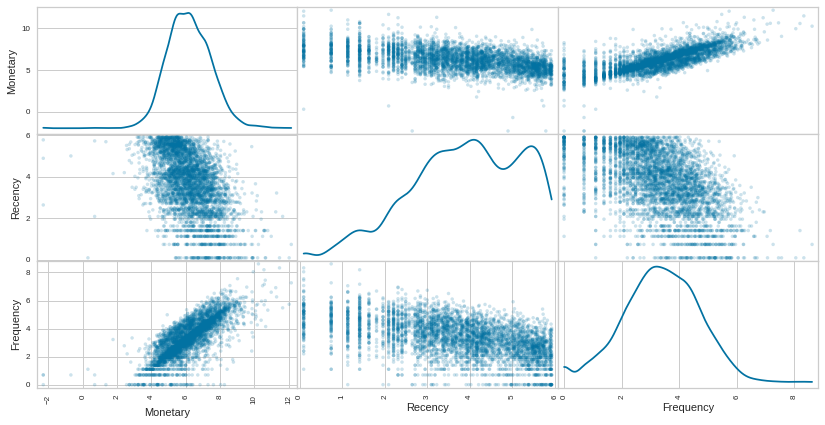

In [102]:
scatter_matrix(log_data, alpha = 0.2, figsize = (14,7), diagonal = 'kde')
plt.show()

In [103]:
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.479671,0.766697
Recency,-0.479671,1.000000,-0.500668
Frequency,0.766697,-0.500668,1.000000


In [104]:
log_data.dropna(subset=['Monetary'],inplace=True)

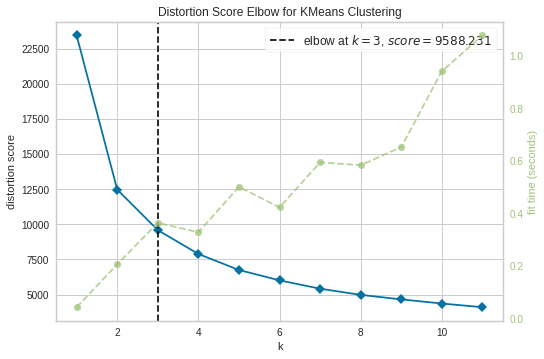

In [105]:
# To find optimum no of clusters for rfm data
log_matrix=log_data.values
visualizer = KElbowVisualizer(kmeans, k=(1, 12))
visualizer.fit(log_matrix)    # Fit the data to the visualizer
visualizer.poof()

In [106]:
n_clusters = 3
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(log_matrix)
clusters_customers = kmeans.predict(log_matrix)

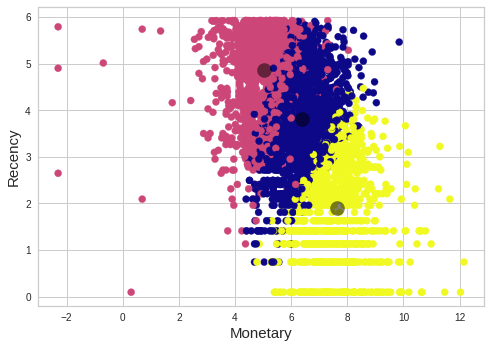

In [107]:
#create a scatter plot
plt.scatter(log_matrix[:, 0], log_matrix[:, 1], c=clusters_customers, s=50, cmap='plasma')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Monetary', fontsize=15)
plt.ylabel('Recency', fontsize=15)
plt.show()

In [108]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T

,0,1,2
Number Customers,1809,1502,993


Although we didn't obtain clearly separated clusters, we were able to build a model that can classify new customers into "low value" , "middle value" and "high value" groups. The clusters assignments are muddled, which may be due to outliers that weren't removed.

In [109]:
df_train.to_excel("/content/drive/MyDrive/capstone project/df_train.xlsx")